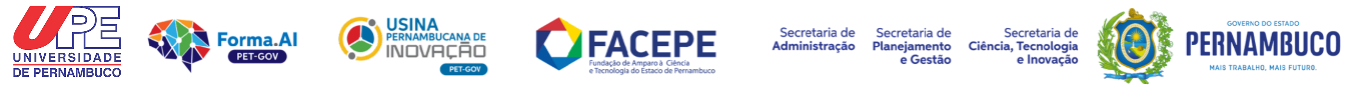

 **Inteligência Artificial, Ciência de dados e Analytics**

Programa de formação de RH-Público em Inteligência Artificial, Ciência de Dados e Analytics (RH.IA-PE)

**Professor Responsável Projeto:** Ph.D. Fernando Buarque de Lima Neto 

**Professor do módulo**: Ph.D. Fernando Buarque de Lima Neto 

Mestrando Gabriel Kopte


---


**Módulo:** 2 - Inteligência Artificial			

**Atividade:** Aula 01 - Sistema especialista *Fuzzy*

#**Exercício de Classe-1: Sistema especialista *Fuzzy***

## **Lógica Fuzzy**

### Introdução

A lógica nebulosa, difusa ou fuzzy se diferencia da lógica tradicional (booleana) pela capacidade de tratar expressões que envolvem variáveis descritivas e não exatas. Na teoria dos conjuntos clássica um elemento possui apenas duas possibilidades: ou pertence a determinado conjunto ou não. Porém, sabe-se bem, que no mundo real quase nada é assim tão determinístico e no dia a dia termos como “um pouquinho” e “mais ou menos” são bastante utilizados sem grandes perdas. Enquanto a teoria clássica diz que uma pessoa que está com uma temperatura de 37,8ºC não está com febre, a maioria das pessoas, seja através de um termômetro ou de uma simples mão na testa, diria que esta pessoa está “esquentada”. Se um programa de computador utilizasse somente lógica booleana para realizar diagnósticos, o estado de quase febre deste paciente seria desprezado e, consequentemente, a chance de um diagnóstico correto seria menor. 

### Comparação com lógica booleana

Um conjunto booleano qualquer A pode ser representado por sua função indicadora, $I_A(x): X→[0,1]$, onde X é o conjunto universo: 



\begin{align}
I_a(x) = \begin{cases}
    1,      & \text{se } x \in A\\
    0,      & \text{se } x \not\in A
\end{cases}
\end{align}




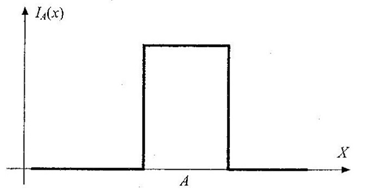

Portanto, um conjunto clássico A pode ser representado pela expressão$A = \{x \in X | I_A(x) = 1 \}$.  Os conjuntos nebulosos são definidos da mesma forma, porém a função indicadora, de natureza discreta (zero ou um), é substituída por uma função de pertinência ($µ$), com valores de zero a um, que expressa quanto o elemento pertence àquele conjunto. Nota-se que não existe uma transição abrupta entre pertencer ou não ao conjunto A, mas sim, uma fase de transição, onde o elemento pertence 10, 30, 50 ou 100%, por exemplo, ao conjunto.

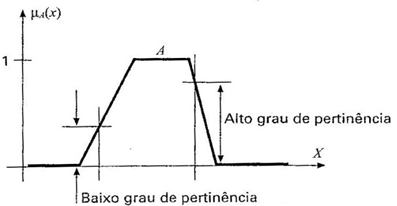

Para que a teoria dos conjuntos nebulosos possa ser utilizada é interessante que as operações da lógica booleana, ou pelo menos a maioria delas, possuam uma versão no conjunto fuzzy. Por isto, define-se aqui de maneira simplificada as operações união, intersecção, complementação e produto. 

#### União (Lógica OU)

A união de dois conjuntos nebulosos A e B que possuem funções de pertinência $μ_A (x)$ e $μ_B (x)$, respectivamente, é definida pela pertinência máxima para cada x pertencente ao conjunto universo $X: ∀x ∈ X,μ_C (x)=max \{ μ_A (x),μ_B (x) \}$.

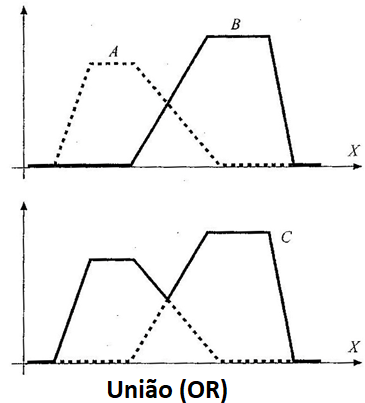

#### Intersessão (Lógica E)

A intersecção é definida como o valor mínimo entre as duas pertinências: $∀x ∈ X,μ_D (x)=min⁡ \{ μ_A (x),μ_B (x) \}$.

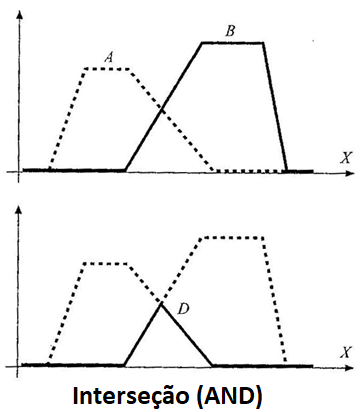

#### Produto e complemento

A complementação do conjunto A possuí a seguinte função de pertinência: $∀x ∈ X,μ_E (x)=1-μ_A (x)$. O produto dos conjuntos A e B é caracterizado pela função de pertinência a seguir: $∀x ∈ X,μ_F (x)=μ_A (x)×μ_B (x)$. 

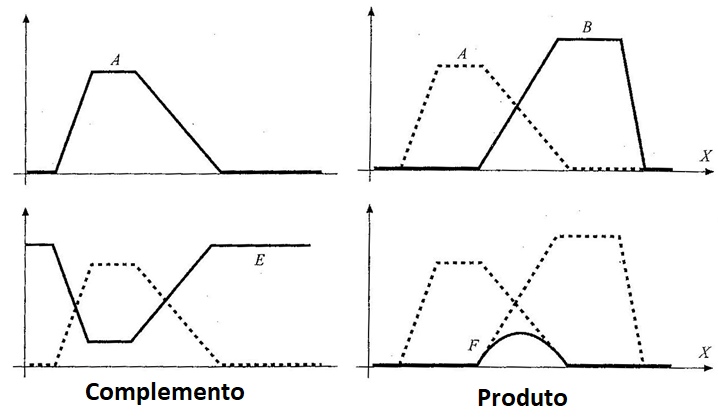

É interessante ressaltar que caso as funções de pertinência sejam iguais às funções indicadoras, as operações com conjuntos nebulosos reproduzem as operações clássicas. Pode-se ainda verificar que nas operações com conjunto difuso a maioria das propriedades clássicas é satisfeita, com exceção de duas, $A∪A^c≠X$ e  $A∩A^c≠∅$, pois o principio da exclusão não é válido nos conjuntos nebulosos.

## **Exemplo: Sistema Especialista *Fuzzy* para controle de uma máquina de lavar**

#### Preparando o ambinete

Instala scikit-fuzzy

In [471]:
%%capture   
!pip install scikit-fuzzy

scikit-fuzzy website: https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html

Carrega as bibliotecas necessária para este exemplo

In [472]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Definição das Variáveis Fuzzy**


Vamos definir as nossas variáveis *fuzzy* para a lógica de **tempo de operação de uma máquina de lavar.** 

Variáveis de entrada:
1.  **Tipo de sujeira:** não gordurosa, médio gordurosa , muito gordurosa
2.  **Quantidade de sujeira:** pouca, média, muita

Variável de Saída:
1.  **Tempo de lavagem:** muito curto, curto, médio, longo, muito longo




#### **Variáveis de entrada**

##### Variável Linguistica: Tipo de Sujeira




In [473]:
# Define as variáveis fuzzy
# Tipo de sujeira tem instervalo de 0 a 10 (Pontuação de quantidade de sujeira)
tipo_sujeira = np.arange(0, 11, 1)
# Cria a funções de pertinêcia da primeira variável
pouco_gordurosa = fuzz.trapmf(tipo_sujeira, [0, 0, 2, 5])
medio_gordurosa = fuzz.trimf(tipo_sujeira, [2, 5, 8])
muito_gordurosa = fuzz.trapmf(tipo_sujeira, [5, 8, 10, 10])

###### Visualização

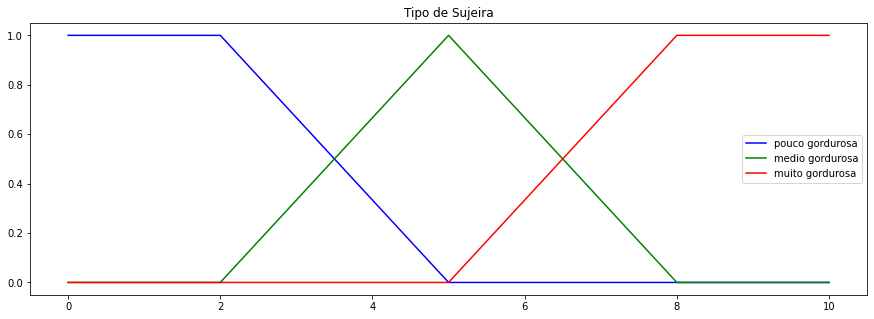

In [474]:
fig0, ax0 = plt.subplots(figsize=(15, 5))
ax0.plot(tipo_sujeira, pouco_gordurosa, 'b', linewidth=1.5, label='pouco gordurosa')
ax0.plot(tipo_sujeira, medio_gordurosa, 'g', linewidth=1.5, label='medio gordurosa')
ax0.plot(tipo_sujeira, muito_gordurosa, 'r', linewidth=1.5, label='muito gordurosa')
ax0.set_title('Tipo de Sujeira')
ax0.legend()

##### Variável Linguistica: Quantidade de sujeira

In [475]:
# Define as variáveis fuzzy
# Quantidade de sujeira tem instervalo de 0 a 10
quantidade_sujeira  = np.arange(0, 11, 1)
pouca = fuzz.trapmf(quantidade_sujeira, [0, 0, 2, 5])
media = fuzz.trimf(quantidade_sujeira, [2, 5, 8])
muita = fuzz.trapmf(quantidade_sujeira, [5, 8, 10, 10])

###### Visualização

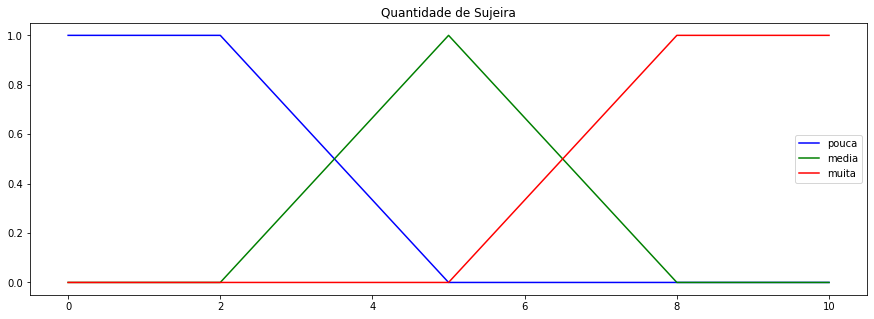

In [476]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(quantidade_sujeira, pouca, 'b', linewidth=1.5, label='pouca')
ax1.plot(quantidade_sujeira, media, 'g', linewidth=1.5, label='media')
ax1.plot(quantidade_sujeira, muita, 'r', linewidth=1.5, label='muita')
ax1.set_title('Quantidade de Sujeira')
ax1.legend()

#### **Variável de Saída**

##### Variável Linguistica: Tempo de Lavagem

In [477]:
# Define as variáveis fuzzy
# Tempo de lavagem tem instervalo de 20 a 120
tempo_lavagem  = np.arange(20, 120, 1)

# Cria a funções de pertinêcia da primeira variável
muito_curto = fuzz.trapmf(tempo_lavagem, [0,20,30, 40])
curto = fuzz.trapmf(tempo_lavagem, [30, 40, 50, 60])
medio = fuzz.trapmf(tempo_lavagem, [50, 60, 80,90])
longo = fuzz.trapmf(tempo_lavagem, [80 ,90, 100, 110])
muito_longo = fuzz.trapmf(tempo_lavagem, [100, 110,120, 120])

###### Visualização

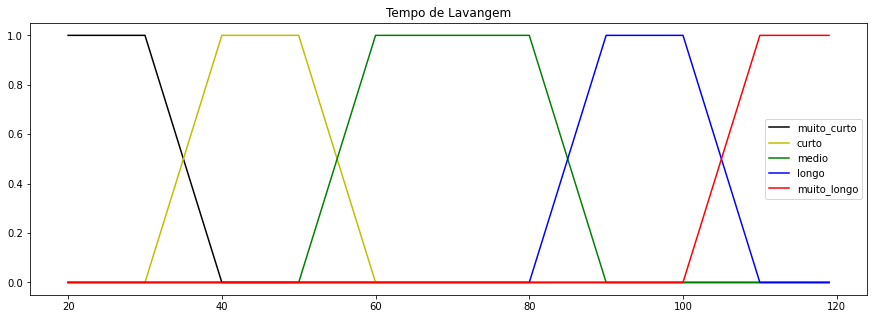

In [478]:
fig2, ax2 = plt.subplots(figsize=(15, 5))

ax2.plot(tempo_lavagem, muito_curto, 'k', linewidth=1.5, label='muito_curto')
ax2.plot(tempo_lavagem, curto, 'y', linewidth=1.5, label='curto')
ax2.plot(tempo_lavagem, medio, 'g', linewidth=1.5, label='medio')
ax2.plot(tempo_lavagem, longo, 'b', linewidth=1.5, label='longo')
ax2.plot(tempo_lavagem, muito_longo, 'r', linewidth=1.5, label='muito_longo')
ax2.set_title('Tempo de Lavangem')
ax2.legend()

#### **Regras Fuzzy**

Para o nosso exemplo da máquina de lavar vamos utilizar as seguintes regras:

1. **Se** <u>quantidade de sujeira</u> é <font color='green'>pouca</font> **E** <u>tipo de sujeira</u> é <font color='blue'>pouco gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>muito curto</font>

2. **Se** <u>quantidade de sujeira</u> é <font color='green'>media</font> **E** <u>tipo de sujeira</u> é <font color='blue'>pouco gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>curto</font>

3. **Se** <u>quantidade de sujeira</u> é <font color='green'>muita</font> **E** <u>tipo de sujeira</u> é <font color='blue'>pouco gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>médio</font>

4. **Se** <u>quantidade de sujeira</u> é <font color='green'>pouca</font> **E** <u>tipo de sujeira</u> é <font color='blue'>medio gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>médio</font>

5. **Se** <u>quantidade de sujeira</u> é <font color='green'>media</font> **E** <u>tipo de sujeira</u> é <font color='blue'>medio gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>médio</font>

6. **Se** <u>quantidade de sujeira</u> é <font color='green'>muita</font> **E** <u>tipo de sujeira</u> é <font color='blue'>medio gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>médio</font>

7. **Se** <u>quantidade de sujeira</u> é <font color='green'>pouca</font> **E** <u>tipo de sujeira</u> é <font color='blue'>muito gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>longo</font>

8. **Se** <u>quantidade de sujeira</u> é <font color='green'>media</font> **E** <u>tipo de sujeira</u> é <font color='blue'>muito gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>longo</font>

9. **Se** <u>quantidade de sujeira</u> é <font color='green'>muita</font> **E** <u>tipo de sujeira</u> é <font color='blue'>muito gordurosa</font> **ENTÃO** <u>tempo de lavangem</u> é <font color='red'>muito longo</font>


#### **Inferência**

Definimos aqui os valores das variável de entrada do sistema fuzzy. 

In [491]:
#TESTE OS CENARIO AQUI
tipo_sujeira_teste = 2             
quantidade_sujeira_teste = 6

Precisamos agora ativar as funções de pertinencia fuzzy. Os valores exatos da função de pertinencia fuzzy 3 e 8, por exemplo, ainda não existem. Fazemos isso com `fuzz.interp_membership`.

In [493]:
pouco_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, pouco_gordurosa, tipo_sujeira_teste)
medio_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, medio_gordurosa, tipo_sujeira_teste)
muito_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, muito_gordurosa, tipo_sujeira_teste)
print('tipo_sujeira_teste = {:.1f}% pouco gordurosa + {:.1f}% medio gordurosa + {:.1f}%muito gordurosa'.format(pouco_gordurosa_teste*100,medio_gordurosa_teste*100,muito_gordurosa_teste*100))

pouca_teste = fuzz.interp_membership(quantidade_sujeira, pouca, quantidade_sujeira_teste)
media_teste = fuzz.interp_membership(quantidade_sujeira, media, quantidade_sujeira_teste)
muita_teste = fuzz.interp_membership(quantidade_sujeira, muita, quantidade_sujeira_teste)
print('quantidade_sujeira_teste = {:.1f}% pouca + {:.1f}% media + {:.1f}% muita'.format(pouca_teste*100,media_teste*100,muita_teste*100))

tipo_sujeira_teste = 100.0% pouco gordurosa + 0.0% medio gordurosa + 0.0%muito gordurosa
quantidade_sujeira_teste = 0.0% pouca + 66.7% media + 33.3% muita


Agora aplicamos nossas regras fuzzy. Devamos usar `np.fmin` para lógica `AND` e `np.fmax` para lógica `OR`.

In [494]:
#1. Se quantidade de sujeira é pouca E tipo de sujeira é pouco gordurosa ...
active_rule1 = np.fmin(pouco_gordurosa_teste, pouca_teste) #Lógica E (AND)
# ...ENTÃO tempo de lavangem é muito curto
muito_curto_atv = np.fmin(active_rule1, muito_curto) 
#Ativa váriável de saída "muito_curto"

#2. Se quantidade de sujeira é media E tipo de sujeira é pouco gordurosa ...
active_rule2 = np.fmin(pouco_gordurosa_teste, media_teste)
# ENTÃO tempo de lavangem é curto
curto_atv = np.fmin(active_rule2, curto)
# Ativa váriável de saída "curto"

#3. Se quantidade de sujeira é muita E tipo de sujeira é pouco gordurosa ...
active_rule3 = np.fmin(pouco_gordurosa_teste, muita_teste)
#4. Se quantidade de sujeira é pouca E tipo de sujeira é medio gordurosa ... 
active_rule4 = np.fmin(medio_gordurosa_teste, pouca_teste)
#5. Se quantidade de sujeira é media E tipo de sujeira é medio gordurosa ...
active_rule5 = np.fmin(medio_gordurosa_teste, media_teste)
#6. Se quantidade de sujeira é muita E tipo de sujeira é medio gordurosa ...
active_rule6 = np.fmin(medio_gordurosa_teste, muita_teste)
# Agregada todas as regras com lógica OU (max) pois a saida para 
# todas elas é "medio"
medio_atv = np.fmax(active_rule3, active_rule4)
medio_atv = np.fmax(active_rule5, medio_atv)
medio_atv = np.fmax(active_rule6, medio_atv)
# ... ENTÃO  tempo de lavangem é médio
medio_atv = np.fmin(medio_atv, medio)
# Ativa váriável de saída "medio"

#7. Se quantidade de sujeira é pouca E tipo de sujeira é muito gordurosa ...
active_rule7 = np.fmin(muito_gordurosa_teste, pouca_teste)
#8. Se quantidade de sujeira é media E tipo de sujeira é muito gordurosa ...
active_rule8 = np.fmin(muito_gordurosa_teste, media_teste)
# Agregada todas as regras com lógica OU (max) pois a saida para 
# todas elas é "longo"
longo_atv = np.fmax(active_rule7,active_rule8)
# ENTÃO tempo de lavangem é longo
longo_atv = np.fmin(longo_atv,longo)
# Ativa váriável de saída "longo"

#9. Se quantidade de sujeira é muita E tipo de sujeira é muito gordurosa ...
active_rule9 = np.fmin(muito_gordurosa_teste, muita_teste)
# ENTÃO tempo de lavangem é muito longo
muito_longo_atv = np.fmin(active_rule9,muito_longo)
# Ativa váriável de saída "muito longo"

# Aqui nós agregamos todas as funções de pertinencia de saída 
aggregated = np.fmax(muito_curto_atv,curto_atv)
aggregated = np.fmax(medio_atv,aggregated)
aggregated = np.fmax(longo_atv,aggregated)
aggregated = np.fmax(muito_longo_atv,aggregated)

##### Visualização

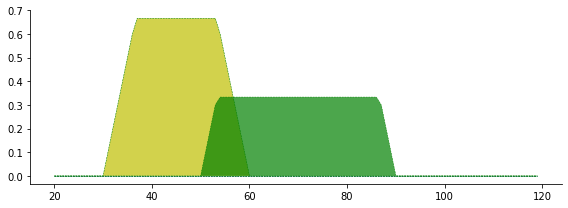

In [495]:
out0 = np.zeros_like(tempo_lavagem)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(tempo_lavagem, out0, muito_curto_atv, facecolor='k', alpha=0.7)
ax0.plot(tempo_lavagem, muito_curto_atv, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(tempo_lavagem, out0, curto_atv, facecolor='y', alpha=0.7)
ax0.plot(tempo_lavagem, curto_atv, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(tempo_lavagem, out0, medio_atv, facecolor='g', alpha=0.7)
ax0.plot(tempo_lavagem, medio_atv, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(tempo_lavagem, out0, longo_atv, facecolor='b', alpha=0.7)
ax0.plot(tempo_lavagem, longo_atv, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(tempo_lavagem, out0, muito_longo_atv, facecolor='r', alpha=0.7)
ax0.plot(tempo_lavagem, muito_longo_atv, 'g', linewidth=0.5, linestyle='--')


# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

##### Defuzzificação 

A desfuzzificação é utilizada para fornecer um valor numérico de saída dos sistemas fuzzy. O valor é obtido partir da função de pertinencia de saída, obtido a partir dos valores de pertinência ao conjunto fuzzy de saída. O processo de desfuzzificação.

###### Métodos de Defuzzificação

1. **Método do Centro de Massa ou Centróide (`centroid`) :** o valor numérico obtido representa o centro de gravidade da distribuição de possibilidade de saída do sistema fuzzy. É optido calculando uma média ponderada entre os centróides utilizando as áreas como pesos.

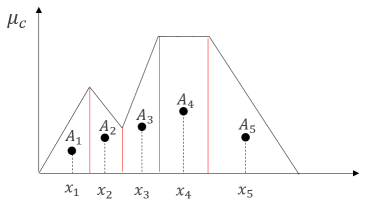

\begin{align}
  COG (Center \, of \, Gravity) = \frac{(A_1*x_1) + (A_2*x_2) + (A_3*x_3) + (A_4*x_4) + (A_5*x_5)}{A_1 + A_2 + A_3 + A_4 + A_5}
\end{align}

2. **Bissetor (`bisector`):** O método bissetor acha a linha vertical que divide a área ativada em duas partes com mesma área. Muitas vezes coincide com o valor do método centriod.

3. **Método da Média dos Máximos(`mom`):** produz um valor numérico que representa o valor médio de todos os valores centrais ativados.

4. **Método dos Máximos (`lom`) ou Mínimos(`som`):** produz um valor numérico igual ao máximo (ou mínimo) valor ativado (adequado quando a forma da distribuição de possibilidade tem um pico).

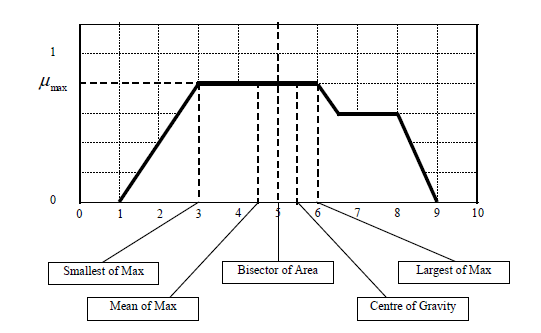

Referência: https://www.mathworks.com/help/fuzzy/defuzzification-methods.html

**Vamos agora realizar a defuzzificação e calcular a saída do sistema especialista fuzzy**

In [496]:
# Calcula o resultado após a defuzzificação
tempo_lavagem_saida = fuzz.defuzz(tempo_lavagem, aggregated, 'centroid')
print('Para \nTipo de sujeira: {}\nQuantidade de sujeira: {}'.format(tipo_sujeira_teste,
                                                          quantidade_sujeira_teste))
print('\n\nTempo de lavagem adequado é {} minutos'.format(int(tempo_lavagem_saida)))

Para 
Tipo de sujeira: 2
Quantidade de sujeira: 6


Tempo de lavagem adequado é 56 minutos


##### Visualização

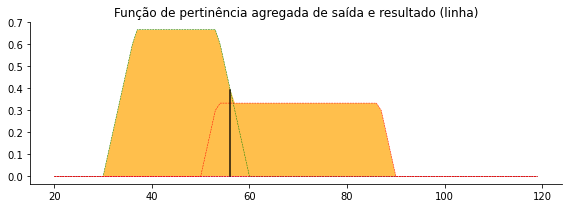

In [497]:
saida_ativada = fuzz.interp_membership(tempo_lavagem, aggregated, tempo_lavagem_saida)  

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(tempo_lavagem, muito_curto_atv, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(tempo_lavagem, curto_atv, 'g', linewidth=0.5, linestyle='--')
ax0.plot(tempo_lavagem, medio_atv, 'r', linewidth=0.5, linestyle='--')
ax0.plot(tempo_lavagem, longo_atv, 'r', linewidth=0.5, linestyle='--')
ax0.plot(tempo_lavagem, muito_longo_atv, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(tempo_lavagem, out0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tempo_lavagem_saida, tempo_lavagem_saida], [0, saida_ativada], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Função de pertinência agregada de saída e resultado (linha)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### **Extra**

Podemos usar os sistema especilista fuzzy de várias maneiras.

Porém existe uma maneira muito simples de se usar um sistema especialista sem a necessidade de utilizar um computador! Se o número de variáveis de entrada for menor que 2 podemos transforma o conhecimento do especialista em uma tabela. Porque não?

Desta forma uma pessoal, sem conhecimento especilista, pode facilmente utilizar conhecimento especialista simplemente consultando a tabela.


In [485]:
tabela_tempo_lavagem = pd.DataFrame()
tempo_lavagem_saida = []
for tipo in range(0,11):
  tempo_lavagem_saida = []
  for quant in range(0,11):
    pouco_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, pouco_gordurosa, tipo)
    medio_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, medio_gordurosa, tipo)
    muito_gordurosa_teste = fuzz.interp_membership(tipo_sujeira, muito_gordurosa, tipo)

    pouca_teste = fuzz.interp_membership(quantidade_sujeira, pouca, quant)
    media_teste = fuzz.interp_membership(quantidade_sujeira, media, quant)
    muita_teste = fuzz.interp_membership(quantidade_sujeira, muita, quant)

    #1. Se quantidade de sujeira é pouca E tipo de sujeira é pouco gordurosa ...
    active_rule1 = np.fmin(pouco_gordurosa_teste, pouca_teste) #Lógica E (AND)
    # ...ENTÃO tempo de lavangem é muito curto
    muito_curto_atv = np.fmin(active_rule1, muito_curto) 
    #Ativa váriável de saída "muito_curto"

    #2. Se quantidade de sujeira é media E tipo de sujeira é pouco gordurosa ...
    active_rule2 = np.fmin(pouco_gordurosa_teste, media_teste)
    # ENTÃO tempo de lavangem é curto
    curto_atv = np.fmin(active_rule2, curto)
    # Ativa váriável de saída "curto"

    #3. Se quantidade de sujeira é muita E tipo de sujeira é pouco gordurosa ...
    active_rule3 = np.fmin(pouco_gordurosa_teste, muita_teste)
    #4. Se quantidade de sujeira é pouca E tipo de sujeira é medio gordurosa ... 
    active_rule4 = np.fmin(medio_gordurosa_teste, pouca_teste)
    #5. Se quantidade de sujeira é media E tipo de sujeira é medio gordurosa ...
    active_rule5 = np.fmin(medio_gordurosa_teste, media_teste)
    #6. Se quantidade de sujeira é muita E tipo de sujeira é medio gordurosa ...
    active_rule6 = np.fmin(medio_gordurosa_teste, muita_teste)
    # Agregada todas as regras com lógica OU (max) pois a saida para 
    # todas elas é "medio"
    medio_atv = np.fmax(active_rule3, active_rule4)
    medio_atv = np.fmax(active_rule5, medio_atv)
    medio_atv = np.fmax(active_rule6, medio_atv)
    # ... ENTÃO  tempo de lavangem é médio
    medio_atv = np.fmin(medio_atv, medio)
    # Ativa váriável de saída "medio"

    #7. Se quantidade de sujeira é pouca E tipo de sujeira é muito gordurosa ...
    active_rule7 = np.fmin(muito_gordurosa_teste, pouca_teste)
    #8. Se quantidade de sujeira é media E tipo de sujeira é muito gordurosa ...
    active_rule8 = np.fmin(muito_gordurosa_teste, media_teste)
    # Agregada todas as regras com lógica OU (max) pois a saida para 
    # todas elas é "longo"
    longo_atv = np.fmax(active_rule7,active_rule8)
    # ENTÃO tempo de lavangem é longo
    longo_atv = np.fmin(longo_atv,longo)
    # Ativa váriável de saída "longo"

    #9. Se quantidade de sujeira é muita E tipo de sujeira é muito gordurosa ...
    active_rule9 = np.fmin(muito_gordurosa_teste, muita_teste)
    # ENTÃO tempo de lavangem é muito longo
    muito_longo_atv = np.fmin(active_rule9,muito_longo)
    # Ativa váriável de saída "muito longo"

    # Aqui nós agregamos todas as funções de pertinencia de saída 
    aggregated = np.fmax(muito_curto_atv,curto_atv)
    aggregated = np.fmax(medio_atv,aggregated)
    aggregated = np.fmax(longo_atv,aggregated)
    aggregated = np.fmax(muito_longo_atv,aggregated)
    tempo_lavagem_saida.append(fuzz.defuzz(tempo_lavagem, aggregated, 'centroid'))
  serie = pd.Series(tempo_lavagem_saida).astype(int)
  saida_pandas = pd.DataFrame({str(tipo):serie})
  tabela_tempo_lavagem = pd.concat([tabela_tempo_lavagem,saida_pandas], axis=1)

Linha: Quantidade de sujeira

Coluna: Tipo de sujeira

In [486]:
tabela_tempo_lavagem

,0,1,2,3,4,5,6,7,8,9,10
0,27,27,27,50,61,70,76,83,95,95,95
1,27,27,27,50,61,70,76,83,95,95,95
2,27,27,27,50,61,70,76,83,95,95,95
3,35,35,35,49,58,69,76,83,95,95,95
4,41,41,41,52,58,69,76,83,95,95,95
5,45,45,45,56,63,70,76,83,95,95,95
6,56,56,56,56,63,69,80,87,98,98,98
7,63,63,63,63,63,69,80,89,103,103,103
8,70,70,70,69,69,70,78,88,111,111,111
9,70,70,70,69,69,70,78,88,111,111,111
